In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms, models
from torchvision.io import read_image
from torch.utils.data import DataLoader, Dataset, random_split
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [5]:
# to store class name
classes_dict = {}

def create_class_name_dict():
    classes_file = '/content/drive/MyDrive/Colab Notebooks/Data/CUB_200_2011/classes.txt'
    try:
        with open(classes_file, 'r') as file:
            lines = file.read().splitlines()

        for i, line in enumerate(lines):
            class_label = line.split('.')[1]
            classes_dict[i] = class_label

    except FileNotFoundError:
        print('File does not exist.\n')
        return None

In [6]:
create_class_name_dict()

### Data Loading and Augmentation

In [8]:
from pyparsing.common import traceback

def denormalize(tensor):
    tensor = tensor*std + mean
    return tensor

def show_img(img):
    # arrange channels
    img = img.numpy().transpose((1,2,0))

    # use mean and std values
    img = denormalize(img)

    # clip values and view image
    img = np.clip(img,0,1)
    plt.imshow(img)


# returns data loader objects, resizing_factor is a size tuple
def get_data_loader(img_dir_path, batch_size=64, transform = None, shuffle=False):

    # create custom dataset object
    dataset = torchvision.datasets.ImageFolder(img_dir_path, transform=transform)

    # create dataloader objects
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle,)

    return data_loader

In [9]:
# define paramteters
resizing_factor = (224, 224)  # specific to VGG
test_ratio = 0.4
batch_size = 64

# normalization paramteters for imagenet
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# define transformers
train_transform = transforms.Compose([
        transforms.Resize(resizing_factor),
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomRotation(15),
        transforms.RandomAffine(degrees = 10,
                                translate = (0.2, 0.2), shear = 10),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)])

test_transform = transforms.Compose([transforms.Resize(resizing_factor),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)])

# get data loaders
train_path = '/content/drive/MyDrive/Colab Notebooks/Data/CUB_200_2011/train_test_cropped/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Data/CUB_200_2011/train_test_cropped/test'
train_loader = get_data_loader(train_path, batch_size, train_transform, shuffle=True)
test_loader = get_data_loader(test_path, batch_size, test_transform, shuffle=False)

### View Images

In [10]:
images, labels = next(iter(train_loader))

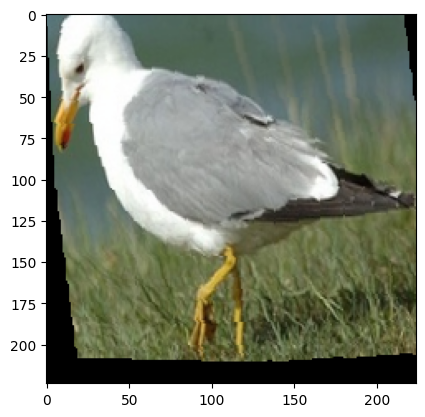

In [11]:
show_img(images[3])

In [13]:
classes_dict[int(labels[3].numpy())]

'California_Gull'